<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
             hair 

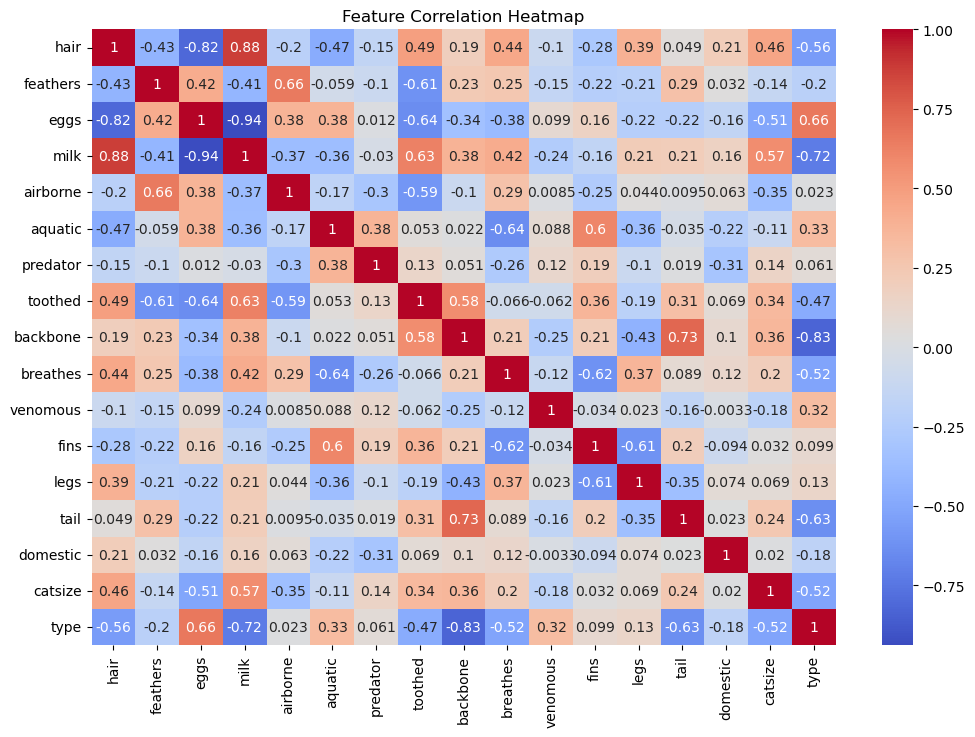

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Zoo.csv')

# Basic info and statistics
print(df.info())
print(df.describe())

# Drop non-numeric column for correlation
df_numeric = df.drop(columns=['animal name'])

# Plot correlation heatmap only for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


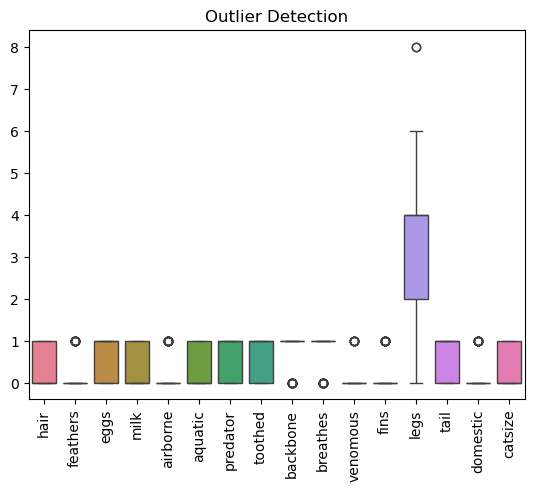

In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Outlier detection (basic)
sns.boxplot(data=df.drop(columns=['animal name', 'type']))
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

# Drop 'animal name' as it's a non-numeric identifier
df = df.drop(columns=['animal name'])

# Features and target
X = df.drop(columns='type')
y = df['type']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Try different k values
k = 5  # You can tune this
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Euclidean distance
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           1       0.27      0.38      0.32         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.25      0.33      0.29         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.19        21
   macro avg       0.07      0.10      0.09        21
weighted avg       0.14      0.19      0.16        21



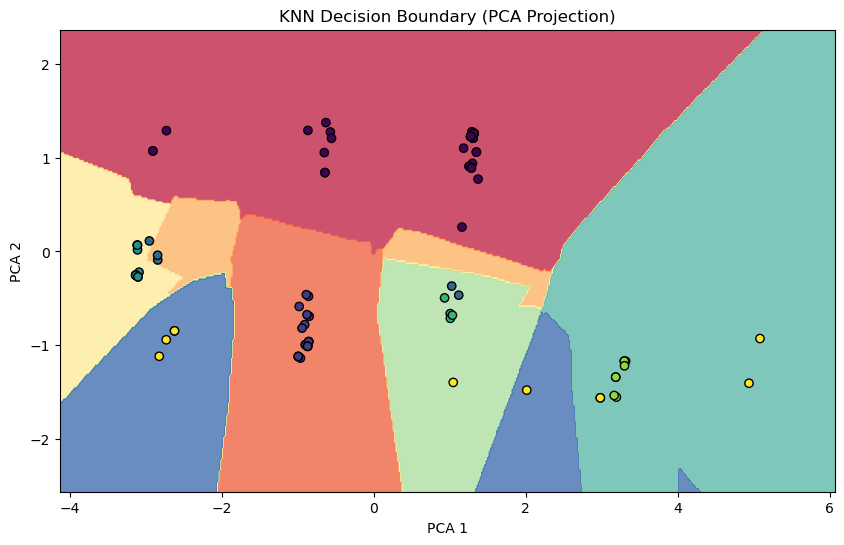

In [20]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Re-fit KNN on reduced data for plotting
knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_reduced, y)

# Plot decision boundary
import numpy as np

h = .02  # step size in mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k')
plt.title("KNN Decision Boundary (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
